In [116]:
# Data Manipulation 
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.mosaicplot import mosaic

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# datetime
import datetime

# Plot the Figures Inline
%matplotlib inline

In [3]:
# Load dataset into pandas dataframe from a .data file "agaricus-lepiota.data"
# The dataset is from UCI Machine Learning Repository

df = pd.read_csv('./dataset/agaricus-lepiota.data', header=None)



In [4]:
headers = ['Class', 'CapShape',
          'CapSurface', 'CapColor',
          'Bruises', 'Odor',
          'GillAttachment','GillSpacing',
          'GillSize','GillColor',
          'StalkShape', 'StalkRoot',
          'StalkAboveRing', 'StalkBelowRing',
          'ColorAboveRing', 'ColorBelowRing',
          'VeilType', 'VeilColor',
          'RingNumber', 'RingType',
          'SporeColor','Population',
          'Habitat']

dataset = pd.read_csv("dataset/agaricus-lepiota.data",
                      header = None,
                      names = headers,
                      sep = ',',
                      na_values=["?"],
                      engine='python')

dataset_raw = dataset.copy()

In [5]:
# print the shape of the dataframe

print("Shape du dataframe:", dataset_raw.shape)

Shape du dataframe: (8124, 23)


In [6]:
# Print the first 5 rows of the dataframe

dataset_raw.head()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# Infos sur le dataset

dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           8124 non-null   object
 1   CapShape        8124 non-null   object
 2   CapSurface      8124 non-null   object
 3   CapColor        8124 non-null   object
 4   Bruises         8124 non-null   object
 5   Odor            8124 non-null   object
 6   GillAttachment  8124 non-null   object
 7   GillSpacing     8124 non-null   object
 8   GillSize        8124 non-null   object
 9   GillColor       8124 non-null   object
 10  StalkShape      8124 non-null   object
 11  StalkRoot       5644 non-null   object
 12  StalkAboveRing  8124 non-null   object
 13  StalkBelowRing  8124 non-null   object
 14  ColorAboveRing  8124 non-null   object
 15  ColorBelowRing  8124 non-null   object
 16  VeilType        8124 non-null   object
 17  VeilColor       8124 non-null   object
 18  RingNumb

In [8]:
# On montre les types

dataset_raw.dtypes

Class             object
CapShape          object
CapSurface        object
CapColor          object
Bruises           object
Odor              object
GillAttachment    object
GillSpacing       object
GillSize          object
GillColor         object
StalkShape        object
StalkRoot         object
StalkAboveRing    object
StalkBelowRing    object
ColorAboveRing    object
ColorBelowRing    object
VeilType          object
VeilColor         object
RingNumber        object
RingType          object
SporeColor        object
Population        object
Habitat           object
dtype: object

In [9]:
# value counts for each type 

dataset_raw.dtypes.value_counts()

object    23
dtype: int64

In [10]:
# Description de la variable target

dataset_raw['Class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: Class, dtype: object

In [11]:
# Describing all the Categorical Features
dataset_raw.describe(include=['O'])

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


C:\Users\Hugom\AppData\Local\Temp\ipykernel_50940\477191572.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


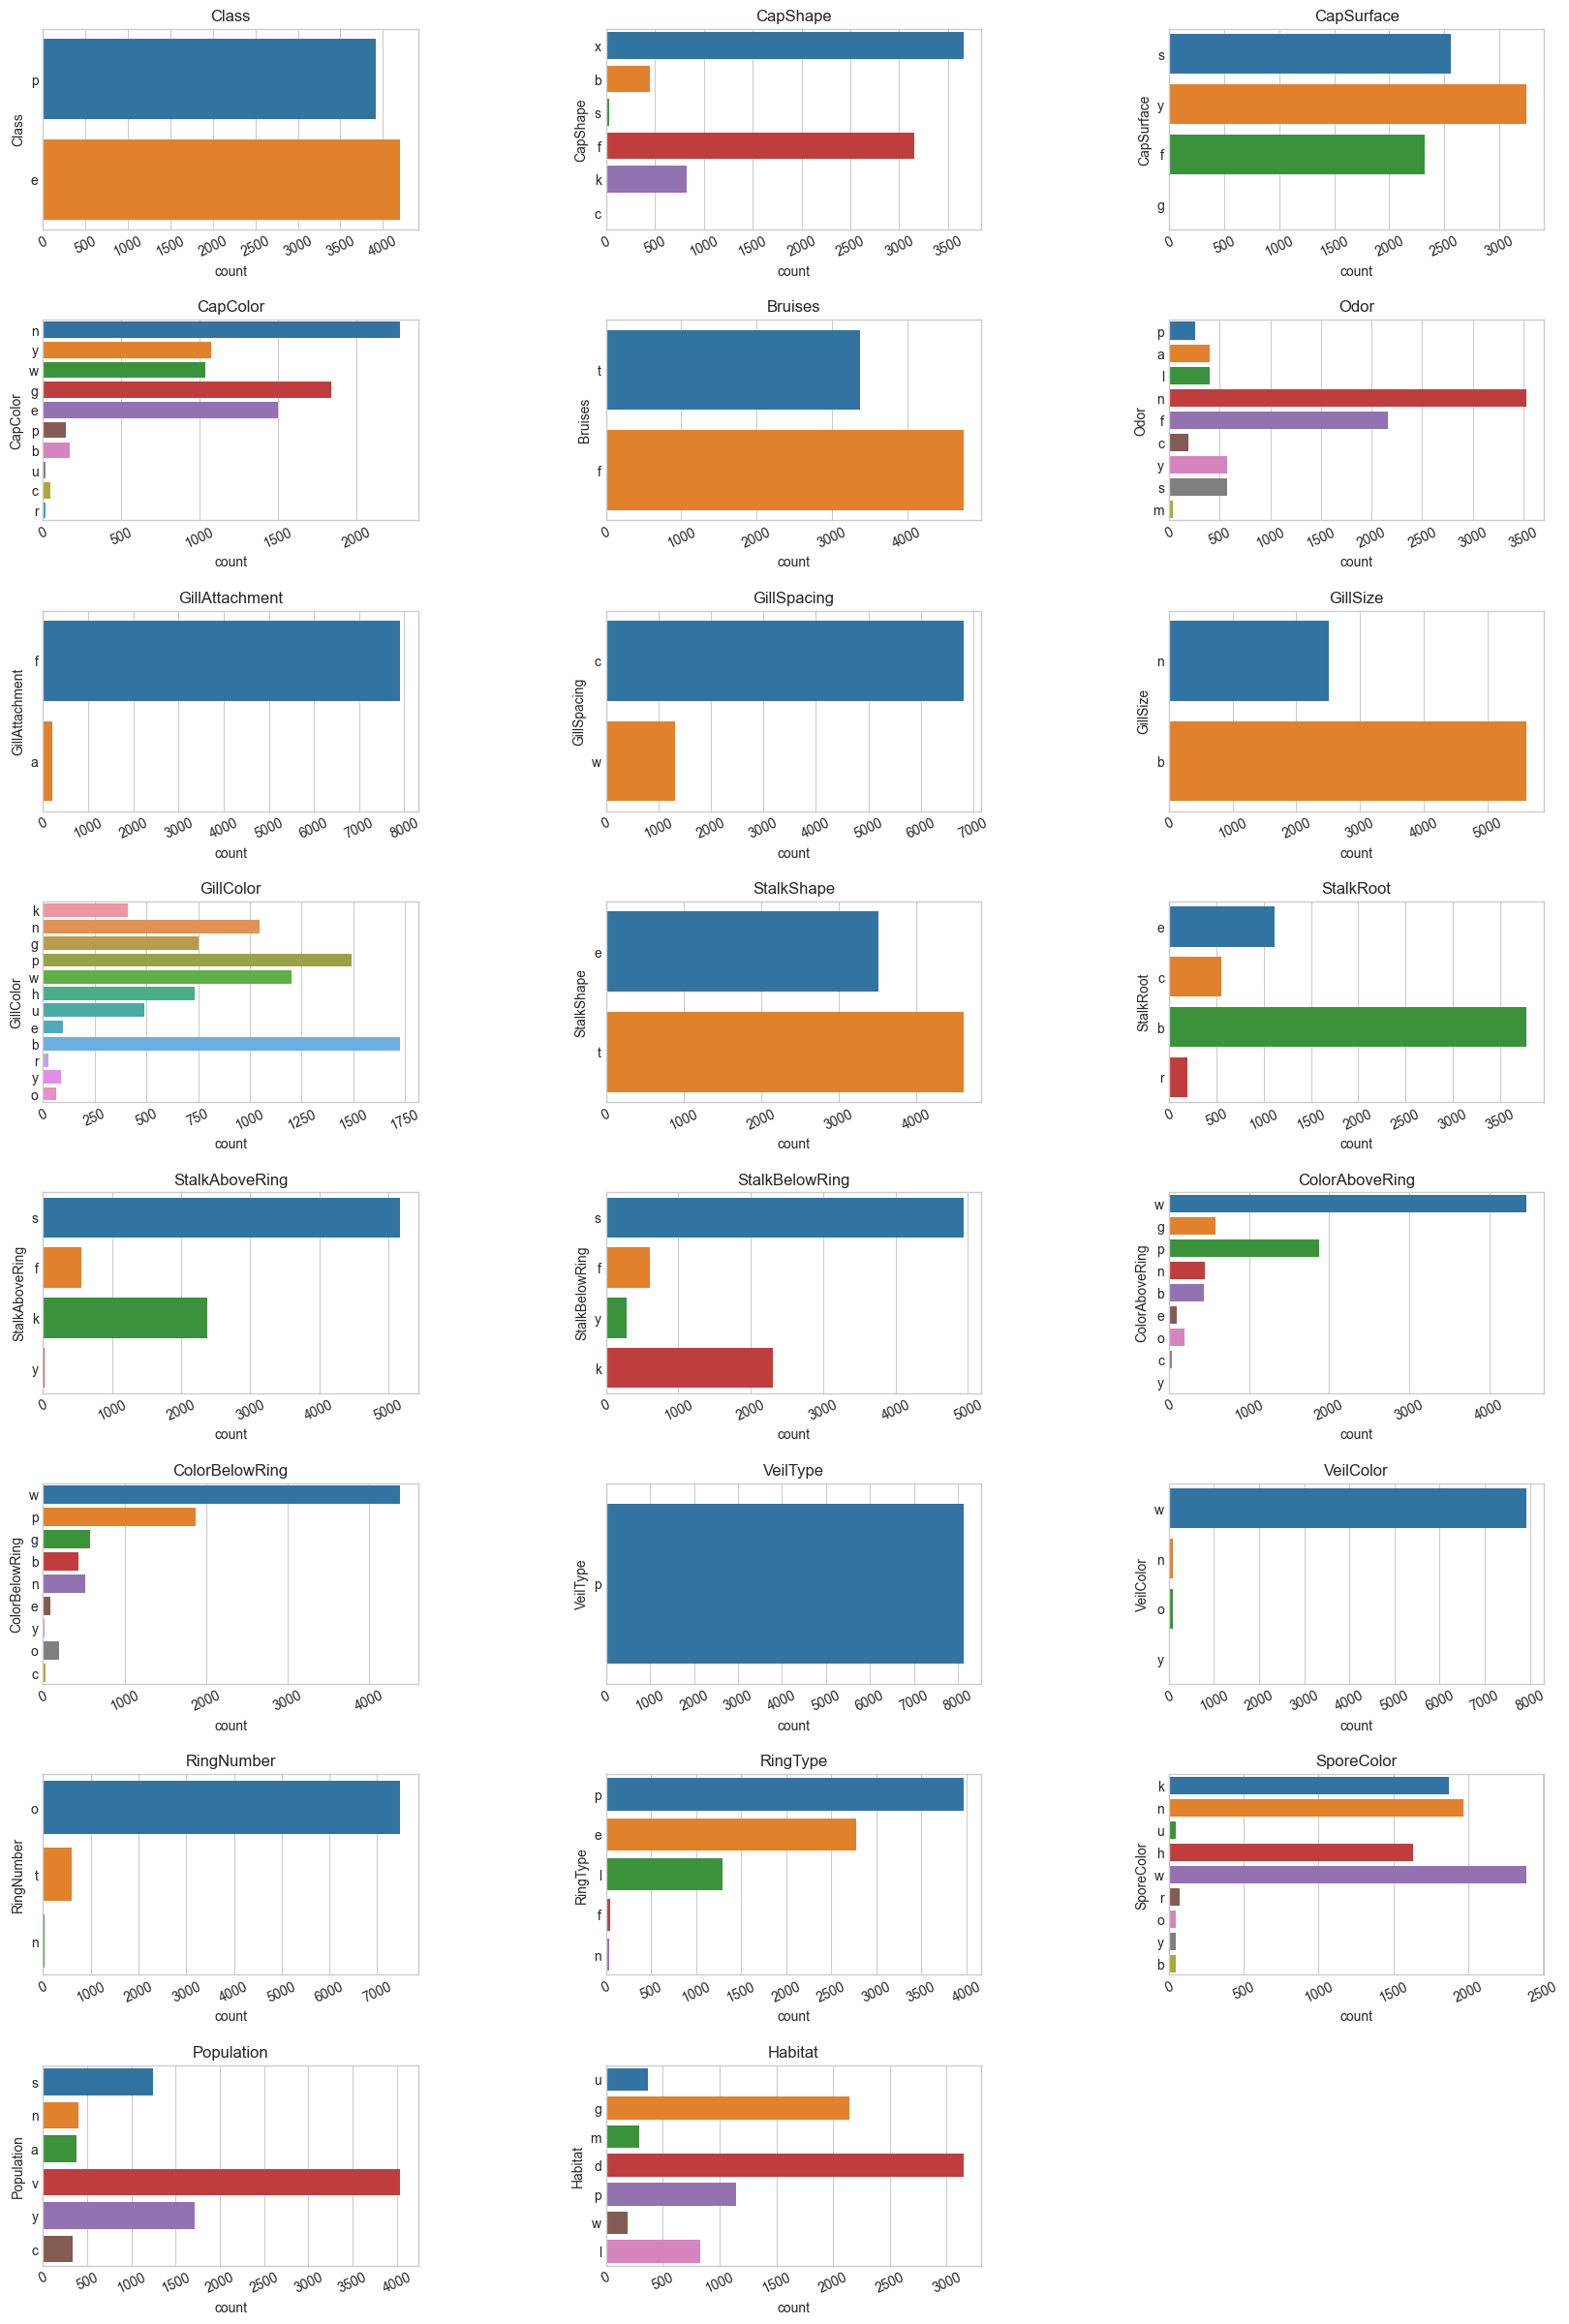

In [12]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(dataset_raw, cols=3, width=20, height=30, hspace=0.45, wspace=0.5)

C:\Users\Hugom\AppData\Local\Temp\ipykernel_50940\1135278427.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


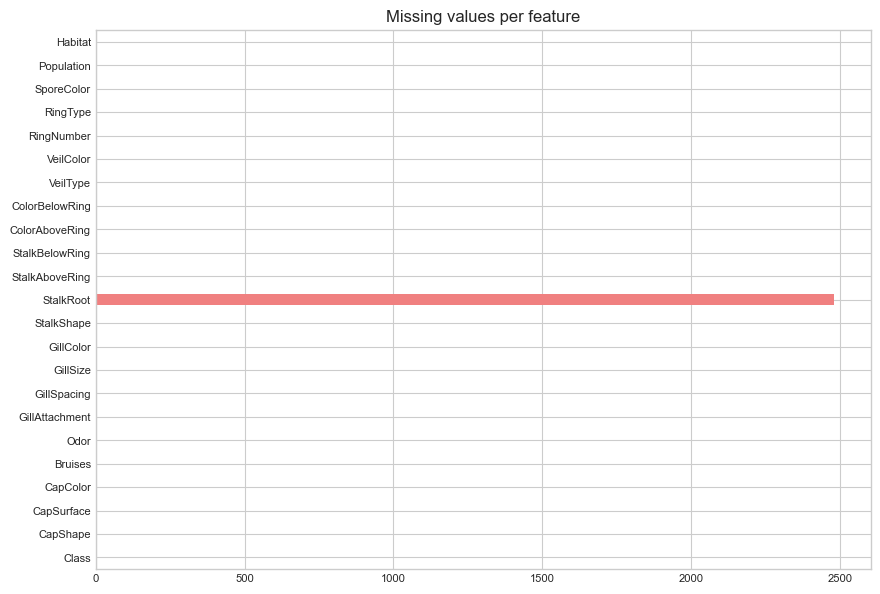

In [13]:
# Missing values plot

def plot_missing_values(dataset, figsize=(10,5)):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_title("Missing values per feature")
    dataset.isnull().sum().plot(kind='barh', color='lightcoral', fontsize=8.0, ax=ax)
    plt.show()

plot_missing_values(dataset_raw, figsize=(10,7))

C:\Users\Hugom\AppData\Local\Temp\ipykernel_50940\2808577586.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


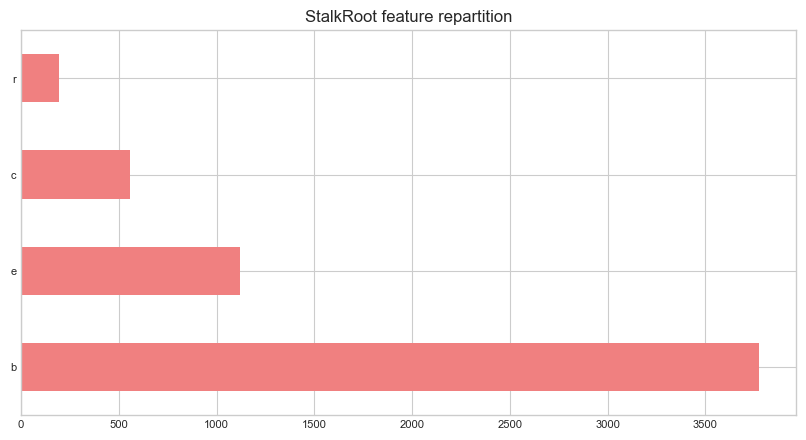

In [14]:
# Show repartition of "StalkRoot" feature in plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("StalkRoot feature repartition")
dataset_raw['StalkRoot'].value_counts().plot(kind='barh', color='lightcoral', fontsize=8.0, ax=ax)
plt.show()

In [15]:
# On fill les valeurs manquantes avec la valeur la plus fréquente

dataset_raw = dataset_raw.apply(lambda x:x.fillna(x.value_counts().index[0]))

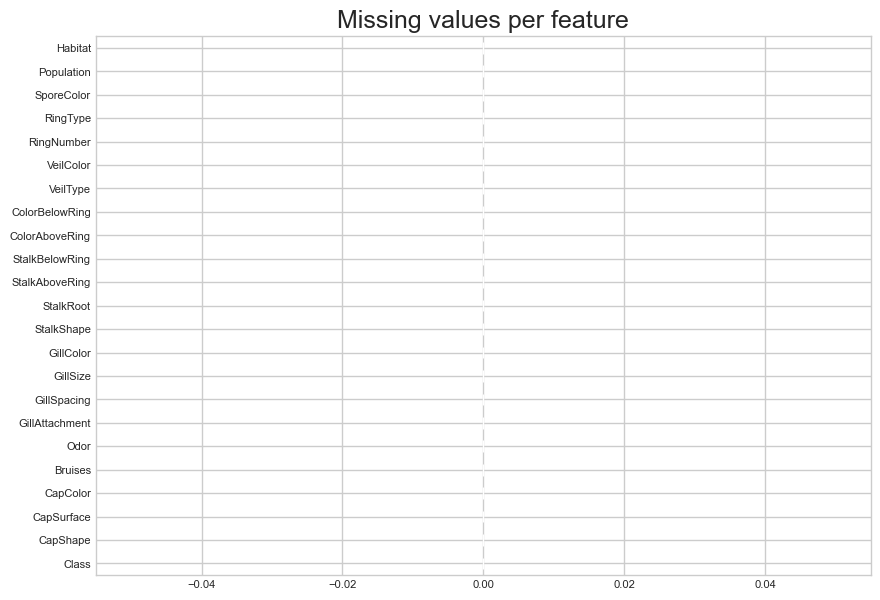

In [182]:
plot_missing_values(dataset_raw, figsize=(10,7))

C:\Users\Hugom\AppData\Local\Temp\ipykernel_50940\2808577586.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


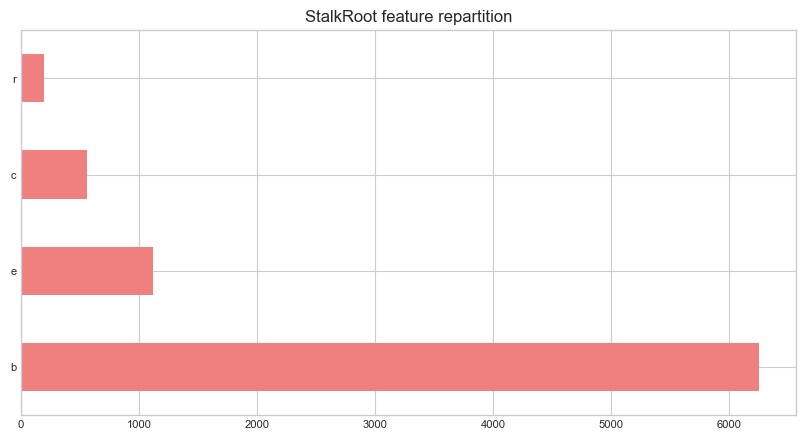

In [17]:
# Show repartition of "StalkRoot" feature in plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("StalkRoot feature repartition")
dataset_raw['StalkRoot'].value_counts().plot(kind='barh', color='lightcoral', fontsize=8.0, ax=ax)
plt.show()

In [18]:
# Let's fix the Class Feature
dataset_raw.loc[dataset_raw['Class'] == 'e', 'Class'] = 0
dataset_raw.loc[dataset_raw['Class'] == 'p', 'Class'] = 1


C:\Users\Hugom\AppData\Local\Temp\ipykernel_50940\56880065.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[Text(0, 0, 'poisonous'), Text(0, 1, 'edible')]

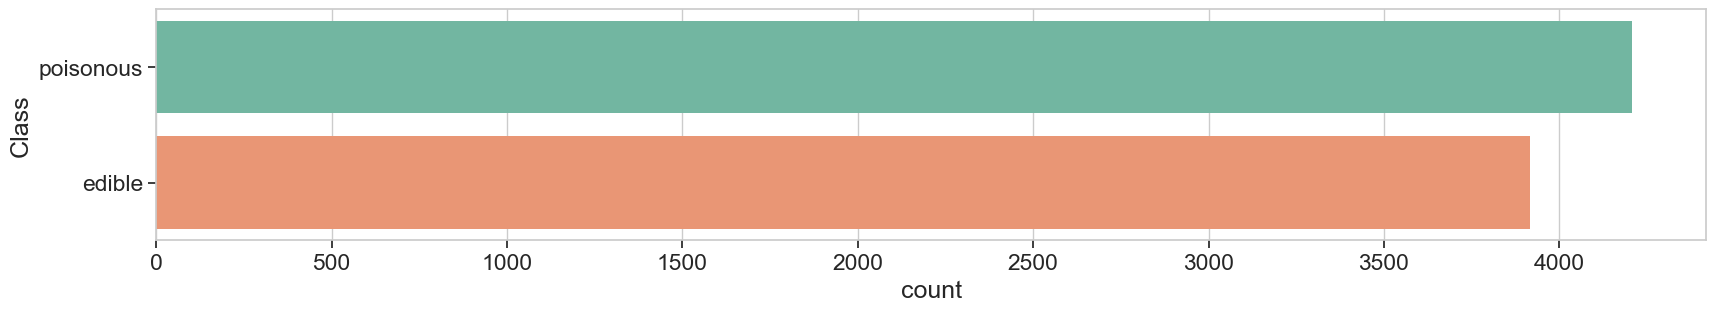

In [19]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.countplot(y="Class", data=dataset_raw, palette="Set2");
g.set_yticklabels(['poisonous','edible'])

In [20]:
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables

for header in headers:
    dataset_bin[header] = dataset_raw[header]

# Define the mapping dictionary for each column
mapping = {
    'CapShape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'CapSurface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'CapColor': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green',
                 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'Bruises': {'t': 'bruises', 'f': 'no'},
    'Odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul',
             'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'GillAttachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'GillSpacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'GillSize': {'b': 'broad', 'n': 'narrow'},
    'GillColor': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                  'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red',
                  'w': 'white', 'y': 'yellow'},
    'StalkShape': {'e': 'enlarging', 't': 'tapering'},
    'StalkRoot': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
                  'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'StalkAboveRing': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'StalkBelowRing': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'ColorAboveRing': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                       'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'ColorBelowRing': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                       'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'VeilType': {'p': 'partial', 'u': 'universal'},
    'VeilColor': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'RingNumber': {'n': 'none', 'o': 'one', 't': 'two'},
    'RingType': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
                 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'SporeColor': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
                   'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'Population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
                   's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'Habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
                'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Iterate over each column and replace the values
for column in dataset_raw.columns:
    if column in mapping:
        dataset_raw[column] = dataset_raw[column].map(mapping[column])


In [21]:
dataset_raw.head(20)

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,0,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,0,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,0,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,0,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,1,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,0,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [22]:
# Print the updated dataset
dataset_bin.head(20)

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,0,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,0,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,1,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,0,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


## Contigency table

In [52]:
def Asses_variable(var1, var2):
    # Delimiter
    print(f"\n\n\n{'-'*50}\n")
    title = f"Variable {var1} and {var2}"
    center_title = title.center(50, ' ')
    print(center_title)

    # Contigency Table
    table = sm.stats.Table.from_data(dataset_raw[[var1, var2]])
    print(f"\n\nTable Original {var2}")
    print(table.table_orig)
    
    # p-value
    rslt = table.test_ordinal_association()
    print("P-value is: ", rslt.pvalue)
    
    # Mosaic plot for visualization
    plt.rcParams['font.size'] = 16.0
    print(f"\n\nMosaic plot for {var2} and {var1}\n")
    mosaic(dataset_raw, [var2, var1])
    plt.show()
    return rslt.pvalue

In [39]:
# We will save all the p-values in a list
pvalues_list = []




--------------------------------------------------

           Variable Class and CapShape            


Table Original CapShape
CapShape  bell  conical  convex  flat  knobbed  sunken
Class                                                 
0          404        0    1948  1596      228      32
1           48        4    1708  1556      600       0
P-value is:  2.004204515820252e-72


Mosaic plot for CapShape and Class



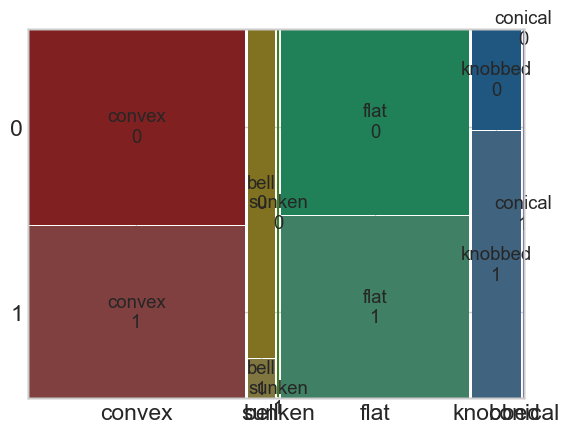




--------------------------------------------------

          Variable Class and CapSurface           


Table Original CapSurface
CapSurface  fibrous  grooves  scaly  smooth
Class                                      
0              1560        0   1504    1144
1               760        4   1740    1412
P-value is:  1.251049055660818e-63


Mosaic plot for CapSurface and Class



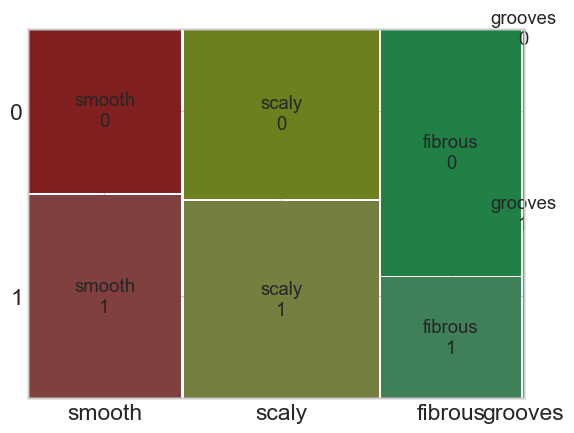




--------------------------------------------------

           Variable Class and CapColor            


Table Original CapColor
CapColor  brown  buff  cinnamon  gray  green  pink  purple  red  white  yellow
Class                                                                         
0          1264    48        32  1032     16    56      16  624    720     400
1          1020   120        12   808      0    88       0  876    320     672
P-value is:  1.361774402681588e-07


Mosaic plot for CapColor and Class



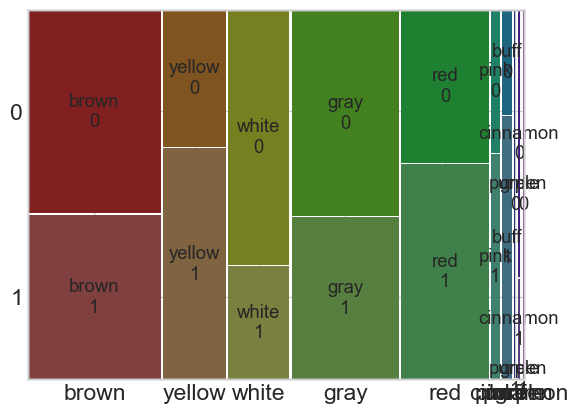




--------------------------------------------------

            Variable Class and Bruises            


Table Original Bruises
Bruises  bruises    no
Class                 
0           2752  1456
1            624  3292
P-value is:  0.0


Mosaic plot for Bruises and Class



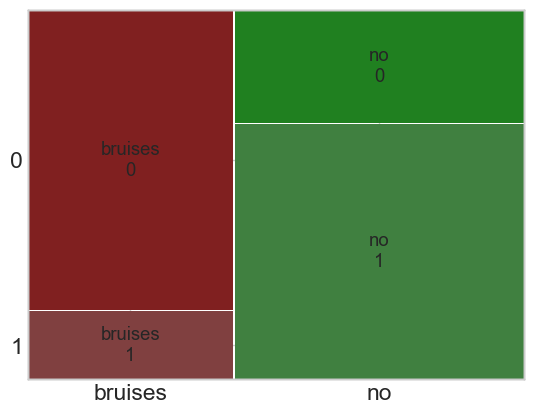




--------------------------------------------------

             Variable Class and Odor              


Table Original Odor
Odor   almond  anise  creosote  fishy  foul  musty  none  pungent  spicy
Class                                                                   
0         400    400         0      0     0      0  3408        0      0
1           0      0       192    576  2160     36   120      256    576
P-value is:  4.337070999877832e-15


Mosaic plot for Odor and Class



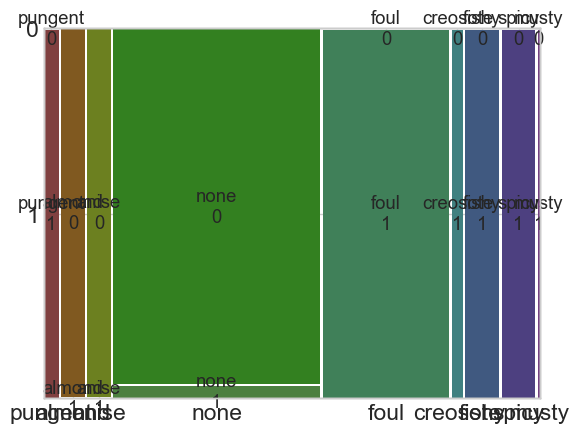




--------------------------------------------------

        Variable Class and GillAttachment         


Table Original GillAttachment
GillAttachment  attached  free
Class                         
0                    192  4016
1                     18  3898
P-value is:  2.4479709343205165e-31


Mosaic plot for GillAttachment and Class



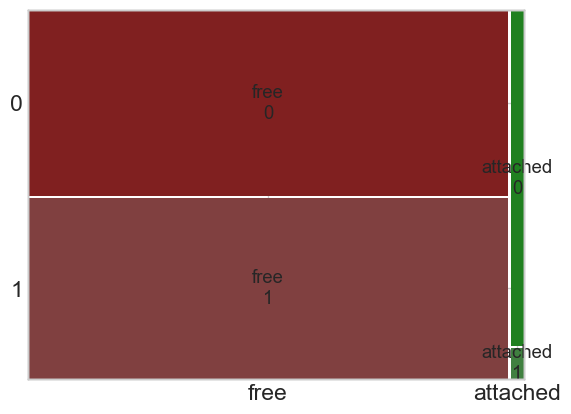




--------------------------------------------------

          Variable Class and GillSpacing          


Table Original GillSpacing
GillSpacing  close  crowded
Class                      
0             3008     1200
1             3804      112
P-value is:  2.068703418689218e-216


Mosaic plot for GillSpacing and Class



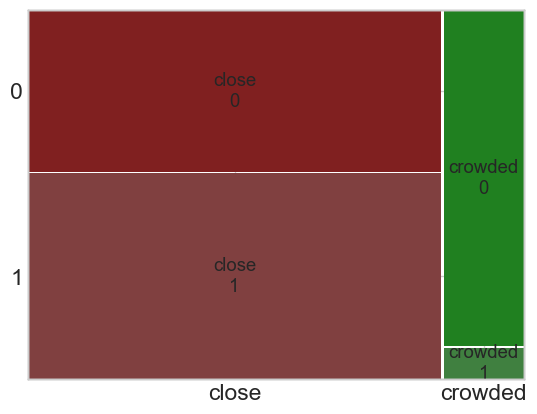




--------------------------------------------------

           Variable Class and GillSize            


Table Original GillSize
GillSize  broad  narrow
Class                  
0          3920     288
1          1692    2224
P-value is:  0.0


Mosaic plot for GillSize and Class



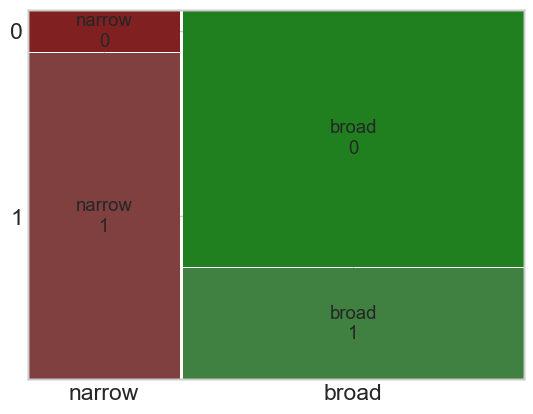




--------------------------------------------------

           Variable Class and GillColor           


Table Original GillColor
GillColor  black  brown  buff  chocolate  gray  green  orange  pink  purple  \
Class                                                                         
0            344    936     0        204   248      0      64   852     444   
1             64    112  1728        528   504     24       0   640      48   

GillColor  red  white  yellow  
Class                          
0           96    956      64  
1            0    246      22  
P-value is:  7.147746481134769e-131


Mosaic plot for GillColor and Class



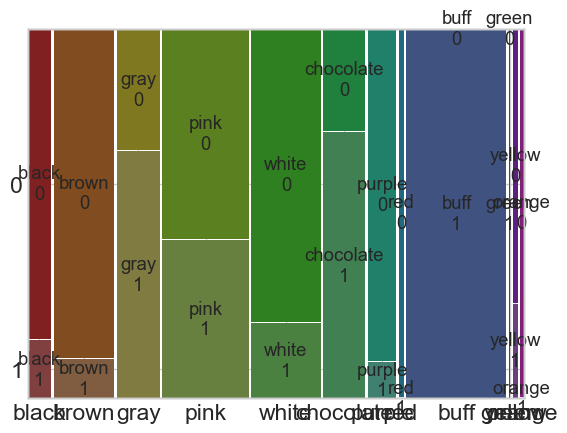




--------------------------------------------------

          Variable Class and StalkShape           


Table Original StalkShape
StalkShape  enlarging  tapering
Class                          
0                1616      2592
1                1900      2016
P-value is:  3.759093524938306e-20


Mosaic plot for StalkShape and Class



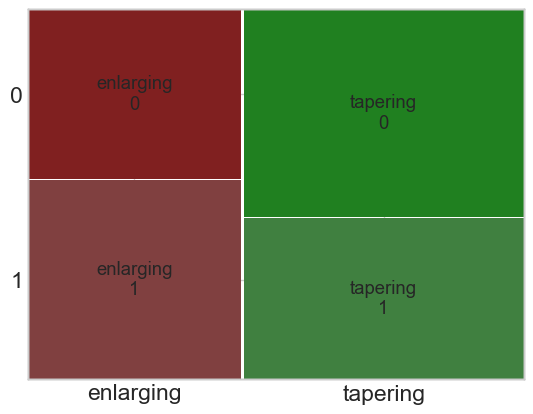




--------------------------------------------------

           Variable Class and StalkRoot           


Table Original StalkRoot
StalkRoot  bulbous  club  equal  rooted
Class                                  
0             2640   512    864     192
1             3616    44    256       0
P-value is:  2.4894321022917304e-187


Mosaic plot for StalkRoot and Class



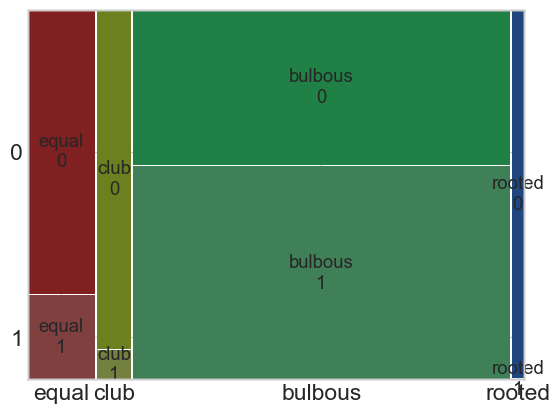




--------------------------------------------------

        Variable Class and StalkAboveRing         


Table Original StalkAboveRing
StalkAboveRing  fibrous  scaly  silky  smooth
Class                                        
0                   408     16    144    3640
1                   144      8   2228    1536
P-value is:  1.026141830643398e-83


Mosaic plot for StalkAboveRing and Class



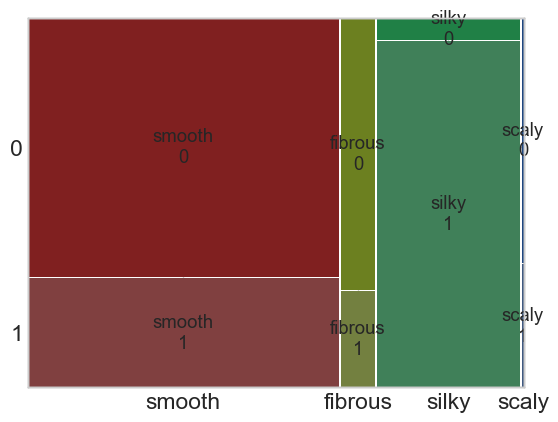




--------------------------------------------------

        Variable Class and StalkBelowRing         


Table Original StalkBelowRing
StalkBelowRing  fibrous  scaly  silky  smooth
Class                                        
0                   456    208    144    3400
1                   144     76   2160    1536
P-value is:  3.9434614289387446e-36


Mosaic plot for StalkBelowRing and Class



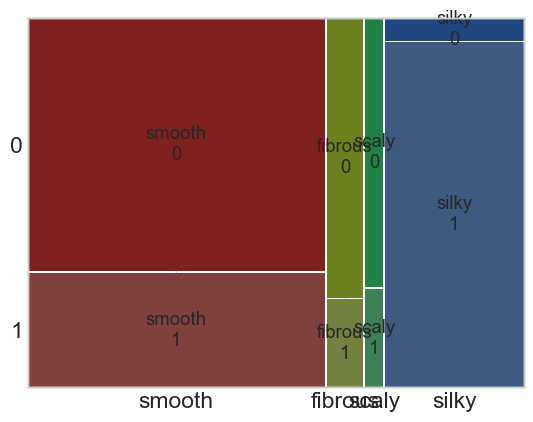




--------------------------------------------------

        Variable Class and ColorAboveRing         


Table Original ColorAboveRing
ColorAboveRing  brown  buff  cinnamon  gray  orange  pink  red  white  yellow
Class                                                                        
0                  16     0         0   576     192   576   96   2752       0
1                 432   432        36     0       0  1296    0   1712       8
P-value is:  5.993526803301405e-125


Mosaic plot for ColorAboveRing and Class



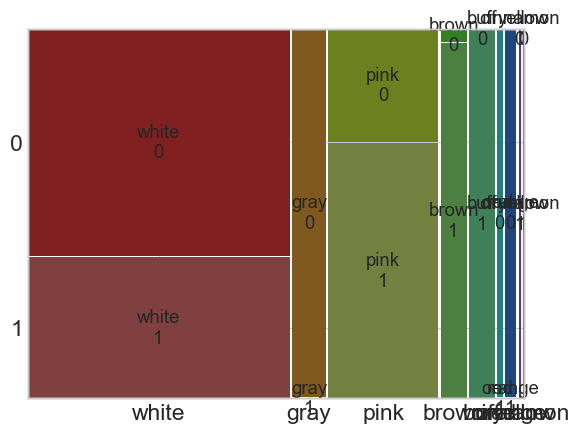




--------------------------------------------------

        Variable Class and ColorBelowRing         


Table Original ColorBelowRing
ColorBelowRing  brown  buff  cinnamon  gray  orange  pink  red  white  yellow
Class                                                                        
0                  64     0         0   576     192   576   96   2704       0
1                 448   432        36     0       0  1296    0   1680      24
P-value is:  3.824832179277648e-108


Mosaic plot for ColorBelowRing and Class



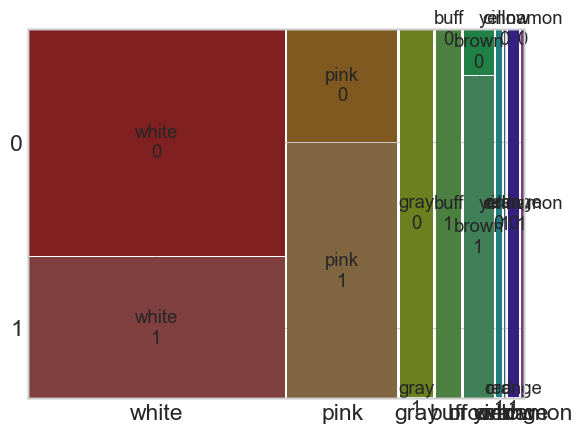




--------------------------------------------------

           Variable Class and VeilType            


Table Original VeilType
VeilType  partial
Class            
0            4208
1            3916
P-value is:  nan


Mosaic plot for VeilType and Class



c:\Users\Hugom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\contingency_tables.py:254: RuntimeWarning: invalid value encountered in double_scalars
  zscore = (statistic - e_stat) / sd_stat


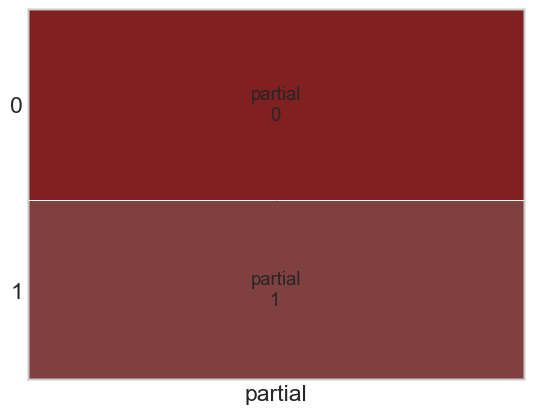




--------------------------------------------------

           Variable Class and VeilColor           


Table Original VeilColor
VeilColor  brown  orange  white  yellow
Class                                  
0             96      96   4016       0
1              0       0   3908       8
P-value is:  2.369731907085988e-38


Mosaic plot for VeilColor and Class



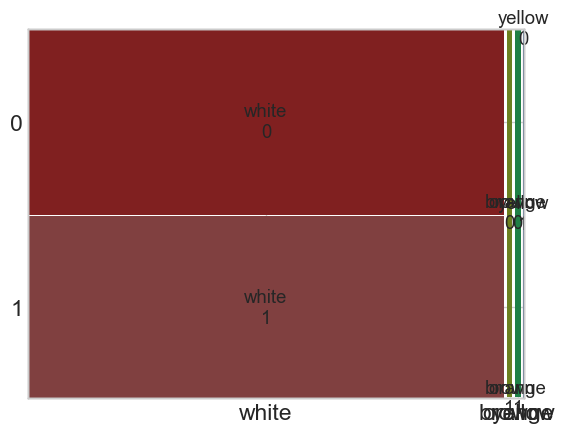




--------------------------------------------------

          Variable Class and RingNumber           


Table Original RingNumber
RingNumber  none   one  two
Class                      
0              0  3680  528
1             36  3808   72
P-value is:  6.5115246234175495e-83


Mosaic plot for RingNumber and Class



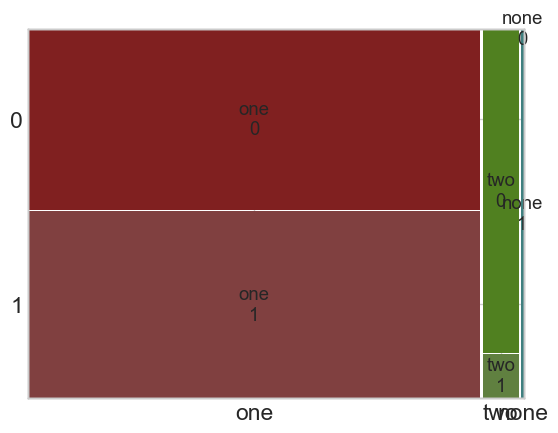




--------------------------------------------------

           Variable Class and RingType            


Table Original RingType
RingType  evanescent  flaring  large  none  pendant
Class                                              
0               1008       48      0     0     3152
1               1768        0   1296    36      816
P-value is:  1.5143200600214458e-301


Mosaic plot for RingType and Class



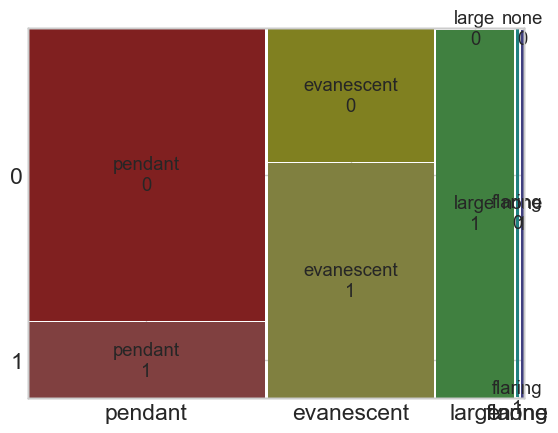




--------------------------------------------------

          Variable Class and SporeColor           


Table Original SporeColor
SporeColor  black  brown  buff  chocolate  green  orange  purple  white  \
Class                                                                     
0            1648   1744    48         48      0      48      48    576   
1             224    224     0       1584     72       0       0   1812   

SporeColor  yellow  
Class               
0               48  
1                0  
P-value is:  0.0


Mosaic plot for SporeColor and Class



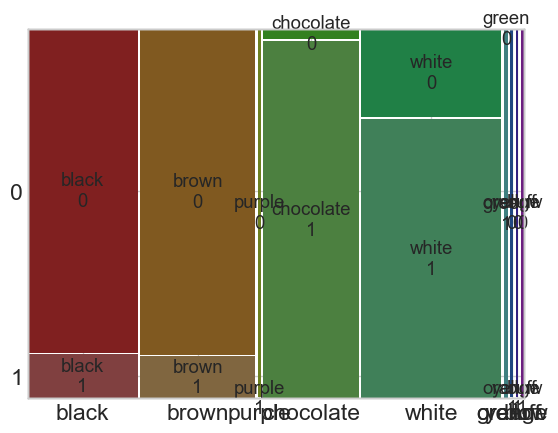




--------------------------------------------------

          Variable Class and Population           


Table Original Population
Population  abundant  clustered  numerous  scattered  several  solitary
Class                                                                  
0                384        288       400        880     1192      1064
1                  0         52         0        368     2848       648
P-value is:  3.117160349628868e-159


Mosaic plot for Population and Class



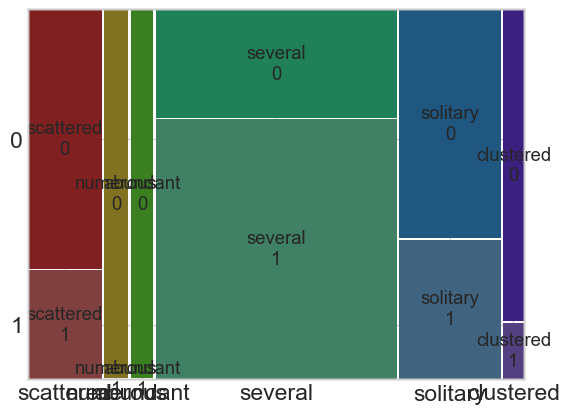




--------------------------------------------------

            Variable Class and Habitat            


Table Original Habitat
Habitat  grasses  leaves  meadows  paths  urban  waste  woods
Class                                                        
0           1408     240      256    136     96    192   1880
1            740     592       36   1008    272      0   1268
P-value is:  0.044276551162074705


Mosaic plot for Habitat and Class



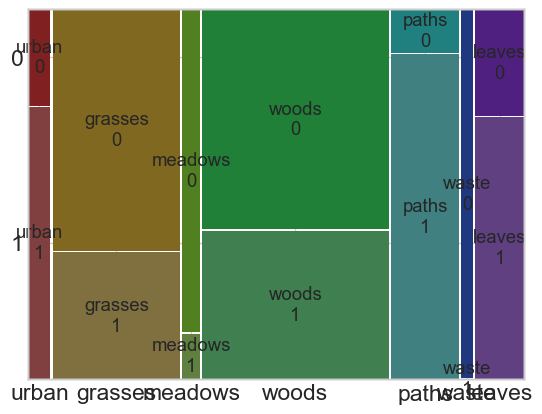

In [53]:
for header in headers:
    pvalues_list.append(Asses_variable('Class', header))

In [54]:
# check pvalues
pvalues_list

[2.004204515820252e-72,
 1.251049055660818e-63,
 1.361774402681588e-07,
 0.0,
 4.337070999877832e-15,
 2.4479709343205165e-31,
 2.068703418689218e-216,
 0.0,
 7.147746481134769e-131,
 3.759093524938306e-20,
 2.4894321022917304e-187,
 1.026141830643398e-83,
 3.9434614289387446e-36,
 5.993526803301405e-125,
 3.824832179277648e-108,
 nan,
 2.369731907085988e-38,
 6.5115246234175495e-83,
 1.5143200600214458e-301,
 0.0,
 3.117160349628868e-159,
 0.044276551162074705,
 2.004204515820252e-72,
 1.251049055660818e-63,
 1.361774402681588e-07,
 0.0,
 4.337070999877832e-15,
 2.4479709343205165e-31,
 2.068703418689218e-216,
 0.0,
 7.147746481134769e-131,
 3.759093524938306e-20,
 2.4894321022917304e-187,
 1.026141830643398e-83,
 3.9434614289387446e-36,
 5.993526803301405e-125,
 3.824832179277648e-108,
 nan,
 2.369731907085988e-38,
 6.5115246234175495e-83,
 1.5143200600214458e-301,
 0.0,
 3.117160349628868e-159,
 0.044276551162074705,
 2.004204515820252e-72,
 1.251049055660818e-63,
 1.361774402681588

pvalue_list has all very low values so all the features have strong relatioship with "Class" variable

In [24]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('Class')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)

dataset_bin_enc.head()

,Class,CapShape_b,CapShape_c,CapShape_f,CapShape_k,CapShape_s,CapShape_x,CapSurface_f,CapSurface_g,CapSurface_s,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Label Encoding    
dataset_con_enc = pd.DataFrame({col: dataset_raw[col].astype('category').cat.codes for col in dataset_raw}, index=dataset_raw.index)

dataset_con_enc.head()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


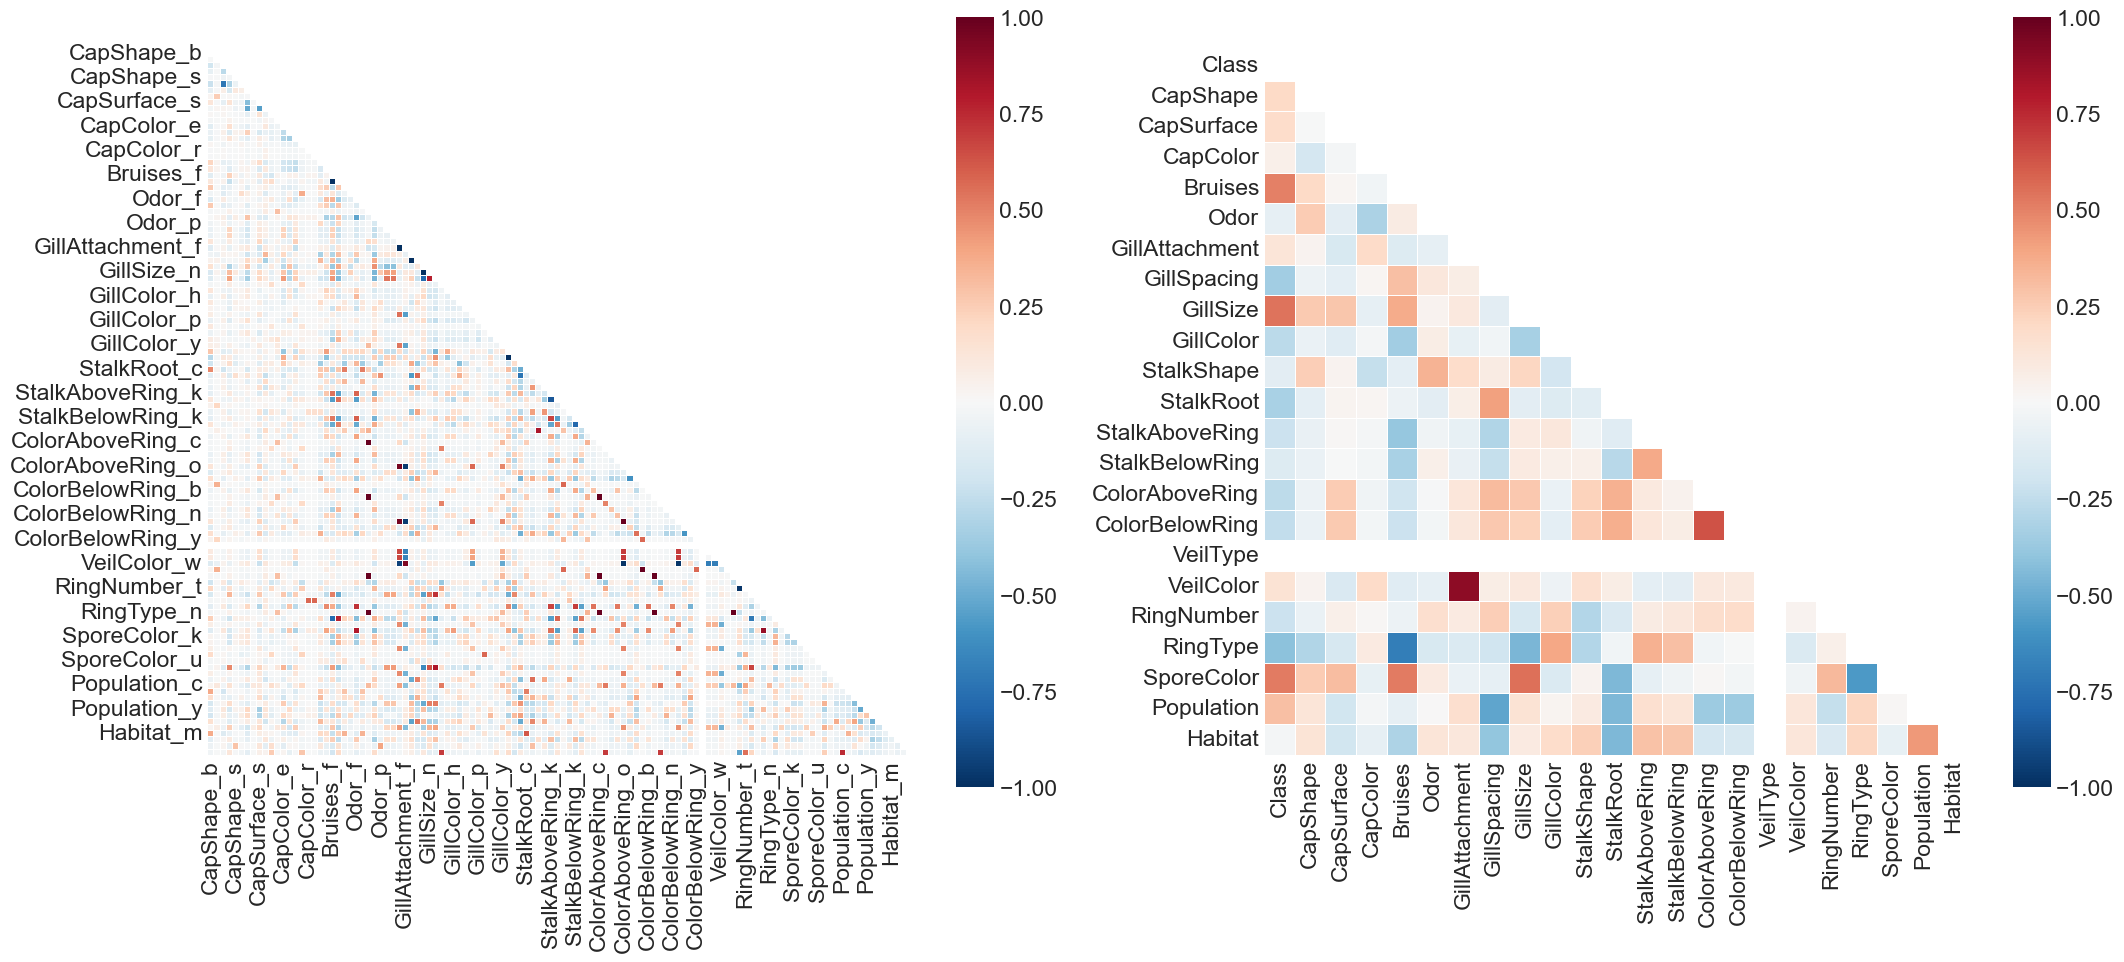

In [58]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Plot for dataset_bin_enc
ax1 = axes[0]
mask1 = np.triu(np.ones_like(dataset_bin_enc.corr(numeric_only=True), dtype=bool))
sns.heatmap(dataset_bin_enc.corr(numeric_only=True),
            vmin=-1, vmax=1,
            square=True,
            cmap='RdBu_r',
            mask=mask1,
            linewidths=0.5,
            ax=ax1)

# Plot for dataset_con_enc
ax2 = axes[1]
mask2 = np.triu(np.ones_like(dataset_con_enc.corr(numeric_only=True), dtype=bool))
sns.heatmap(dataset_con_enc.corr(numeric_only=True),
            vmin=-1, vmax=1,
            square=True,
            cmap='RdBu_r',
            mask=mask2,
            linewidths=0.5,
            ax=ax2)

plt.show()

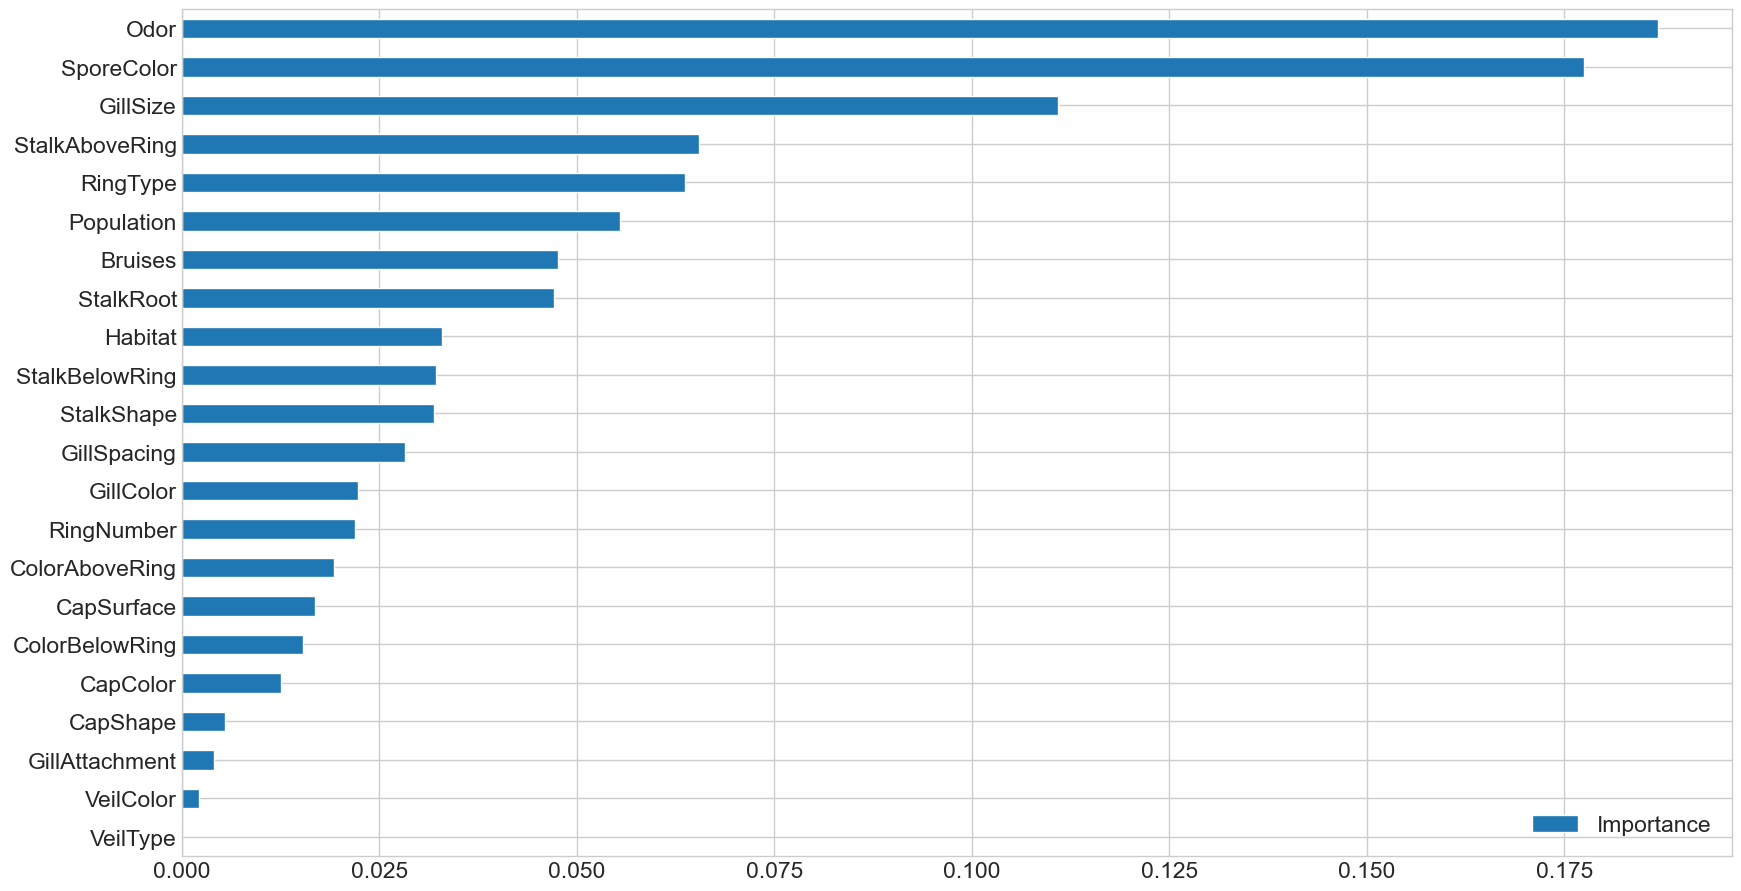

In [62]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('Class', axis=1), dataset_con_enc['Class'])

sns.set_style('whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('Class', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

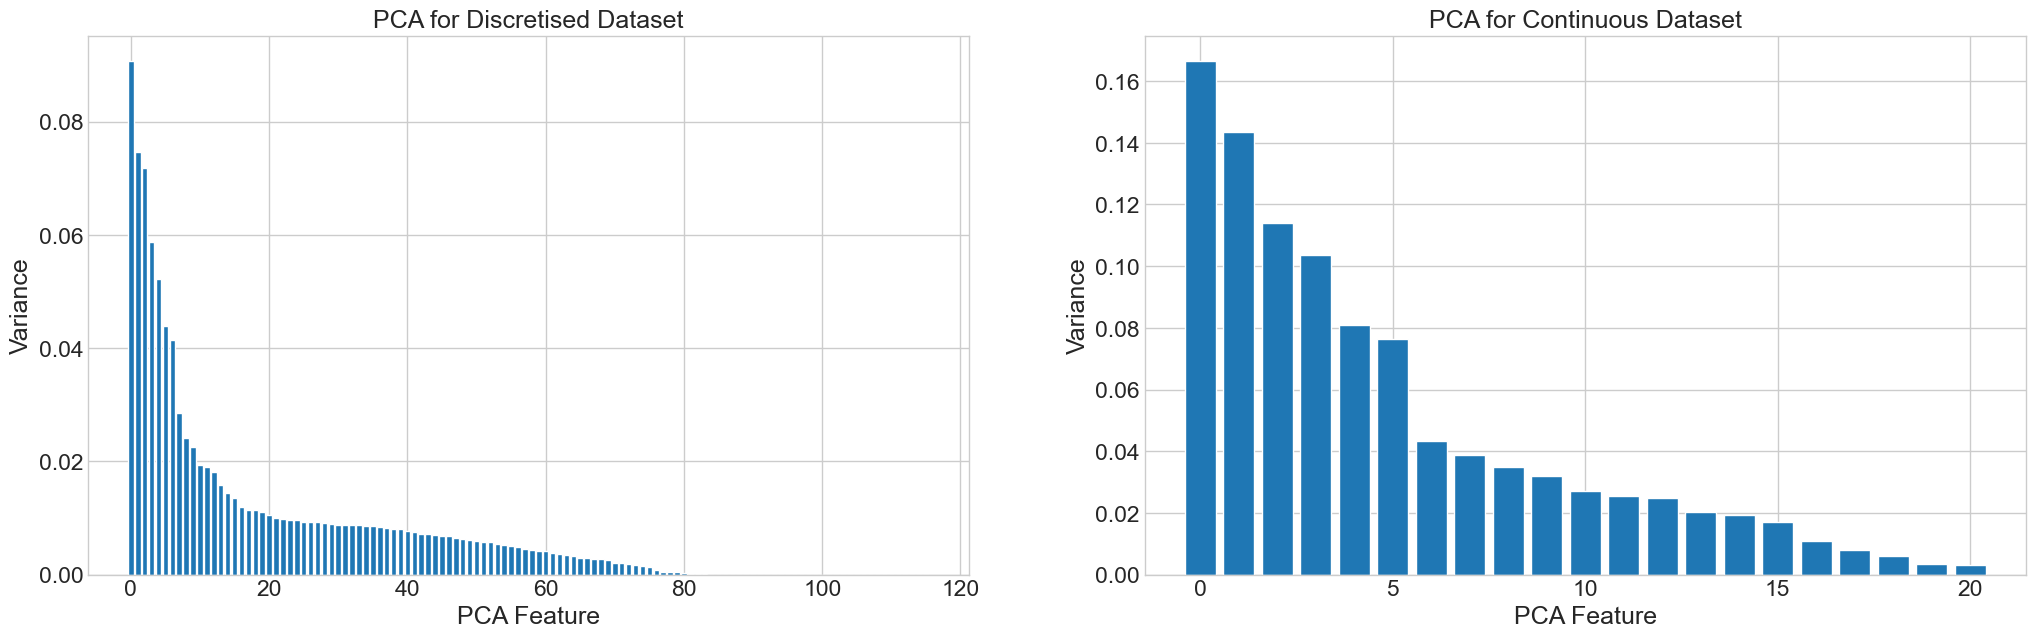

In [68]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(dataset_bin_enc.drop('Class', axis=1))
X = std_scale.transform(dataset_bin_enc.drop('Class', axis=1))
pca1 = PCA(n_components=len(dataset_bin_enc.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('Class', axis=1))
X = std_scale.transform(dataset_con_enc.drop('Class', axis=1))
pca2 = PCA(n_components=len(dataset_con_enc.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
sns.set_style('whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

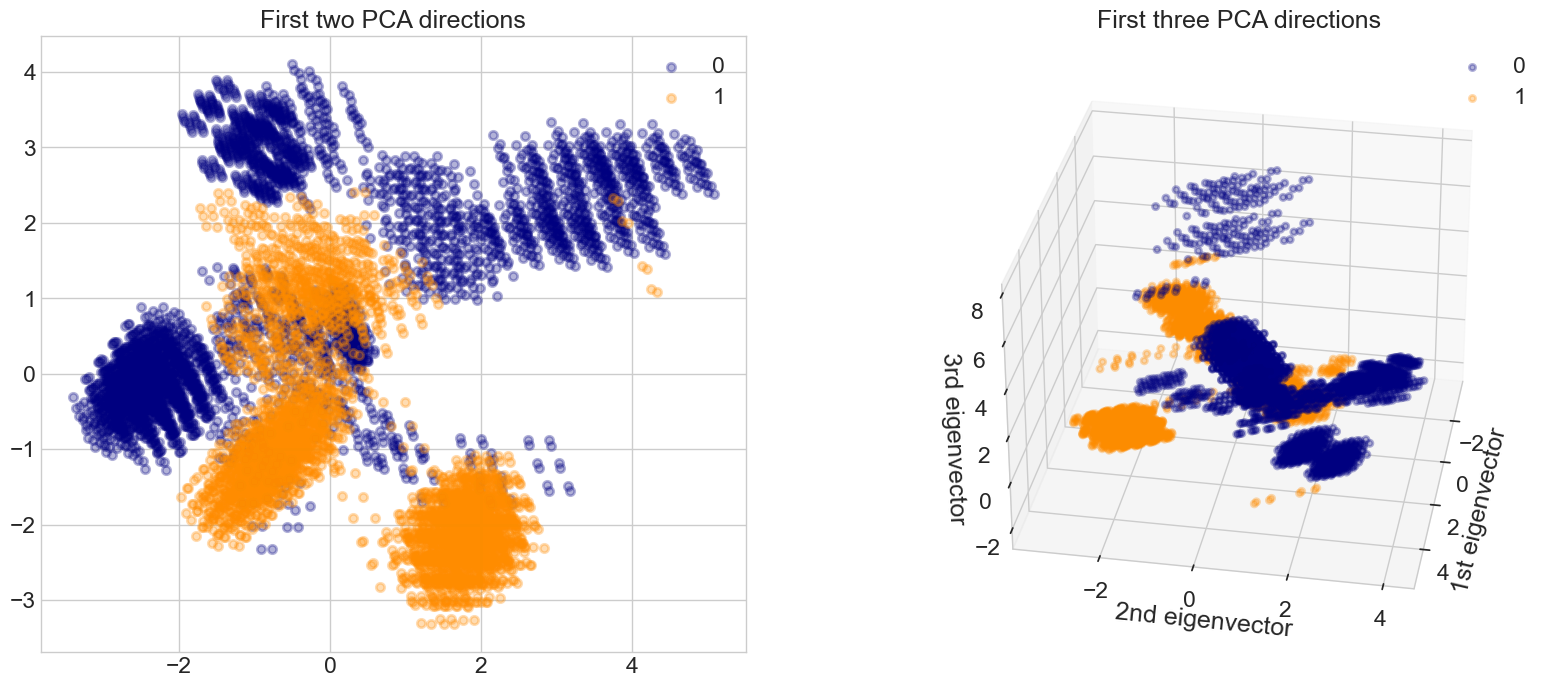

In [70]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('Class', axis=1))
X = std_scale.transform(dataset_con_enc.drop('Class', axis=1))
y = dataset_con_enc['Class']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
sns.set_style('whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

Feature Ranking For Non-Discretised: [13  3 11  6  8  4  1  1  9  1  1  2 10  5 12 14  1  1  1  1  7  1]
Optimal number of features: 9


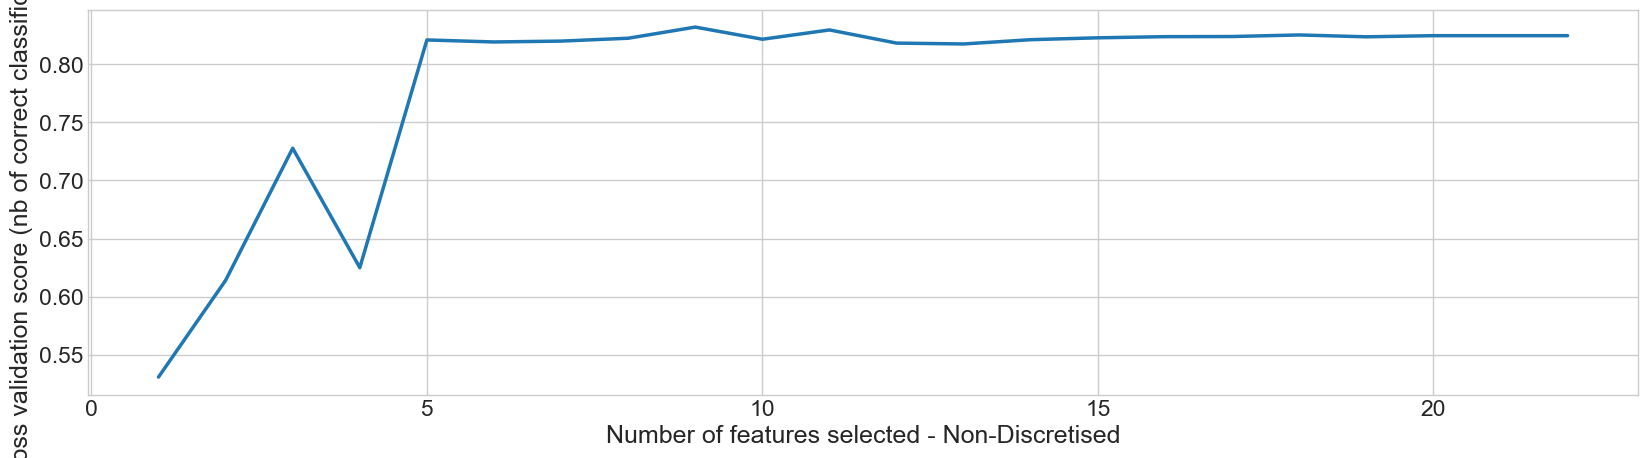

In [77]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_con_enc.drop('Class', axis=1).values)

selector1 = RFECV(LogisticRegression(max_iter=1000, solver='lbfgs'), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(scaled_data, dataset_con_enc['Class'].values)
print("Feature Ranking For Non-Discretised: %s" % selector1.ranking_)
print("Optimal number of features: %d" % selector1.n_features_)

# Plot number of features VS. cross-validation scores
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.cv_results_['mean_test_score']) + 1), selector1.cv_results_['mean_test_score'])

### Selecting Dataset

We now have two datasets to choose from to apply our ML algorithms. The one-hot-encoded, and the label-encoded. For now, we have decided not to use feature reduction or selection algorithms.

In [78]:
# OPTIONS:
# - dataset_bin_enc
# - dataset_con_enc

# Change the dataset to test how would te algorithm perform under differently encoded datasets.

selected_dataset = dataset_con_enc
selected_dataset.head()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


## Splitting Data into Training and Testing Datasets

In [79]:
# Splitting dataset into train adn test data
train = selected_dataset.sample(frac=0.7)
test = selected_dataset.loc[~selected_dataset.index.isin(train.index)]
print(train.shape)
print(test.shape)

(5687, 23)
(2437, 23)


### Removing Samples with Missing data

We could have removed rows with missing data during feature cleaning, but we're choosing to do it at this point. It's easier to do it this way, right after we split the data into Training and Testing. Otherwise we would have had to keep track of the number of deleted rows in our data and take that into account when deciding on a splitting boundary for our joined data.

In [82]:
# Given missing fields are a small percentange of the overall dataset, 
# we have chosen to delete them.
train = train.dropna(axis=0)
test = test.dropna(axis=0)

train.shape

(5687, 23)

In [83]:
test.shape

(2437, 23)

### Rename datasets before Machine Learning algos

In [84]:
X_train_w_label = train
X_train = train.drop(['Class'], axis=1)
y_train = train['Class'].astype('int64')
X_test = test.drop(['Class'], axis=1)
y_test = test['Class'].astype('int64')

# Machine Learning Algorthims

### Data review

Let's see our data.

In [86]:
X_train.shape

(5687, 22)

In [88]:
X_test.head()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkBelowRing,ColorAboveRing,ColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporeColor,Population,Habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
8,2,2,8,0,7,1,0,1,7,0,...,3,7,7,0,2,1,4,0,4,0
10,2,2,9,0,1,1,0,0,4,0,...,3,7,7,0,2,1,4,1,2,0
16,3,0,8,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0
18,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,1,3,4


In [89]:
y_train.head()

6623    1
6689    1
979     0
5791    1
5103    1
Name: Class, dtype: int64

In [92]:
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.
random.seed(18)

### Algorithms

From here, we will be running the following algorithms.

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

Because there's a great deal of repetitiveness on the code for each, we'll create a custom function to analyse this.

For some algorithms, we have also chosen to run a Random Hyperparameter search, to select the best hyperparameters for a given algorithm.

In [159]:
accuracy = {}

In [129]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [139]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    elif (isinstance(algo, (LinearSVC, SGDClassifier))):
        probs = model.decision_function(X_test)
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [123]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Specify parameters and distributions to sample from
param_dist = {'penalty': [None, 'l2'],
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-20, 20, 10000),
              'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression(solver='lbfgs', max_iter=2000)
random_search = RandomizedSearchCV(lrc,
                                   n_jobs=-1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 2.03 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'penalty': None, 'intercept_scaling': 3.10777268270977e-16, 'class_weight': 'balanced', 'C': 6.265845729433528e-11}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'penalty': None, 'intercept_scaling': 9.72968566613297e-20, 'class_weight': 'balanced', 'C': 1.0282559000161366e-19}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'penalty': None, 'intercept_scaling': 17511539675058.568, 'class_weight': 'balanced', 'C': 1.0698008294791242e-07}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'penalty': None, 'intercept_scaling': 1.4458259377089016e-19, 'class_weight': 'balanced', 'C': 199126890955.78415}

Model with rank: 5
Mean validation score: 0.969 (std: 0.002)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.4598775553950788e-17, 'class_weight': None, 'C':

In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def showResults(model_name, param):
    # print model name
    print("-"*100)
    center_model_name = model_name.center(100, ' ')
    print(center_model_name)
    print("-"*100)

    start_time = time.time()
    train_pred, test_pred, acc, acc_cv, probs = fit_ml_algo(param, 
                                                            X_train, 
                                                            y_train, 
                                                            X_test, 
                                                            10)
    log_time = (time.time() - start_time)
    print("Accuracy: %s" % acc)
    print("Accuracy CV 10-Fold: %s" % acc_cv)
    print("Running Time: %s" % datetime.timedelta(seconds=log_time))

    print("\nClassification Report Train Data")
    print(metrics.classification_report(y_train, train_pred))

    print("\nClassification Report Test Data")
    print(metrics.classification_report(y_test, test_pred))

    # Check the shapes of y_test and probs
    print("Shape of y_test:", y_test.shape)
    print("Shape of probs:", probs.shape)

    print("\nROC AUC Score")
    plot_roc_curve(y_test, probs)

    return {"acc": acc, "acc_cv": acc_cv, "log_time": log_time, "props": probs}

## Logistic Regression

----------------------------------------------------------------------------------------------------
                                        Logistic Regression                                         
----------------------------------------------------------------------------------------------------
Accuracy: 96.06
Accuracy CV 10-Fold: 95.85
Running Time: 0:00:00.593547

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2925
           1       0.97      0.94      0.96      2762

    accuracy                           0.96      5687
   macro avg       0.96      0.96      0.96      5687
weighted avg       0.96      0.96      0.96      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1283
           1       0.97      0.94      0.96      1154

    accuracy                           0.96      2437
   macro avg 

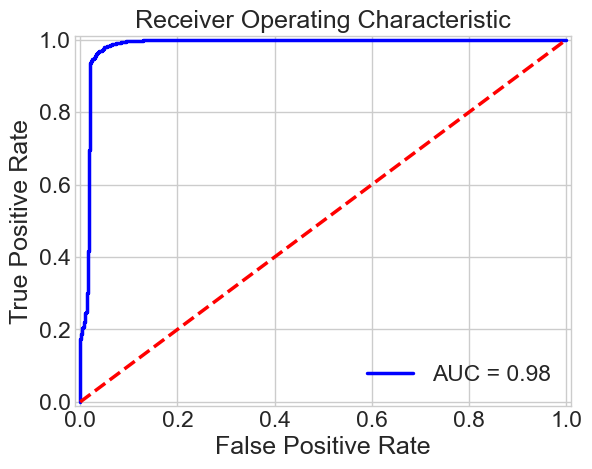

In [162]:
# Logistic Regression
accuracy["LogisticRegression"] = showResults("Logistic Regression", LogisticRegression(n_jobs = -1))

## k-Nearest Neighors

----------------------------------------------------------------------------------------------------
                                        K-Nearest Neighbors                                         
----------------------------------------------------------------------------------------------------
Accuracy: 100.0
Accuracy CV 10-Fold: 99.98
Running Time: 0:00:02.611185

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      2762

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       1.00      1.00      1.00      1154

    accuracy                           1.00      2437
   macro avg 

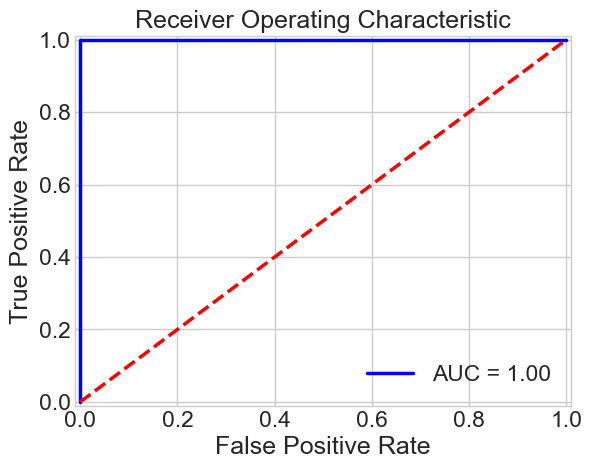

In [163]:
# K-Nearest Neighbors
accuracy["K-Nearest Neighbors"] = showResults("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors = 3, n_jobs = -1))

## Gaussian Naive Bayes

----------------------------------------------------------------------------------------------------
                                        Gaussian Naive Bayes                                        
----------------------------------------------------------------------------------------------------
Accuracy: 83.22
Accuracy CV 10-Fold: 83.15
Running Time: 0:00:00.827012

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2925
           1       0.81      0.85      0.83      2762

    accuracy                           0.83      5687
   macro avg       0.83      0.83      0.83      5687
weighted avg       0.83      0.83      0.83      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1283
           1       0.81      0.85      0.83      1154

    accuracy                           0.83      2437
   macro avg 

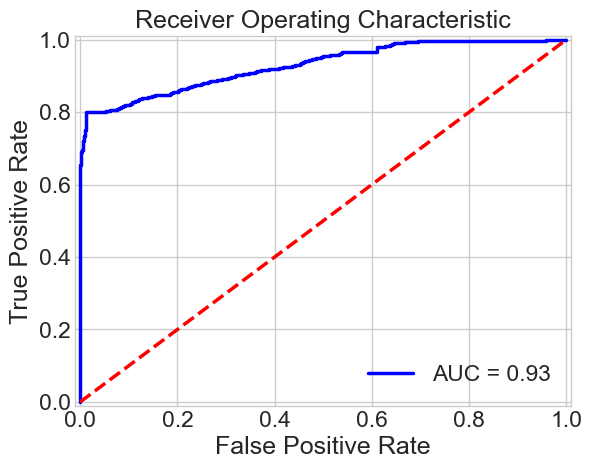

In [164]:
# Gaussian Naive Bayes
accuracy["Gaussian Naive Bayes"] = showResults("Gaussian Naive Bayes", GaussianNB())

## Linear SVC

----------------------------------------------------------------------------------------------------
                                             Linear SVC                                             
----------------------------------------------------------------------------------------------------
Accuracy: 96.22
Accuracy CV 10-Fold: 95.76
Running Time: 0:00:00.868875

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2925
           1       0.96      0.95      0.96      2762

    accuracy                           0.96      5687
   macro avg       0.96      0.96      0.96      5687
weighted avg       0.96      0.96      0.96      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1283
           1       0.96      0.96      0.96      1154

    accuracy                           0.96      2437
   macro avg 

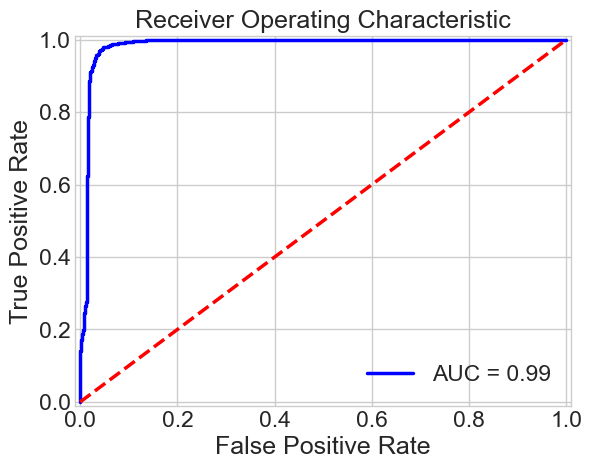

In [165]:
# Linear SVC
accuracy["Linear SVC"] = showResults("Linear SVC", LinearSVC())

## Gradient Descent

----------------------------------------------------------------------------------------------------
                                          Gradient Descent                                          
----------------------------------------------------------------------------------------------------
Accuracy: 97.33
Accuracy CV 10-Fold: 95.73
Running Time: 0:00:00.136988

Classification Report Train Data
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2925
           1       0.96      0.95      0.96      2762

    accuracy                           0.96      5687
   macro avg       0.96      0.96      0.96      5687
weighted avg       0.96      0.96      0.96      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1283
           1       0.95      0.99      0.97      1154

    accuracy                           0.97      2437
   macro avg 

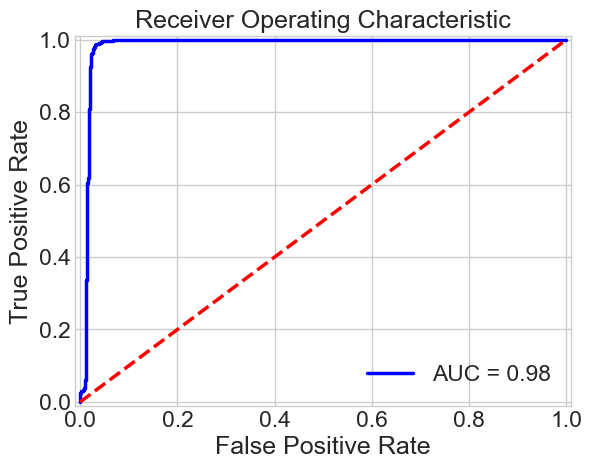

In [166]:
# Gradient Descent
accuracy["Gradient Descent"] = showResults("Gradient Descent", SGDClassifier(n_jobs = -1))

## Decision tree classifier

----------------------------------------------------------------------------------------------------
                                      Decision Tree Classifier                                      
----------------------------------------------------------------------------------------------------
Accuracy: 100.0
Accuracy CV 10-Fold: 100.0
Running Time: 0:00:00.049865

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      2762

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       1.00      1.00      1.00      1154

    accuracy                           1.00      2437
   macro avg 

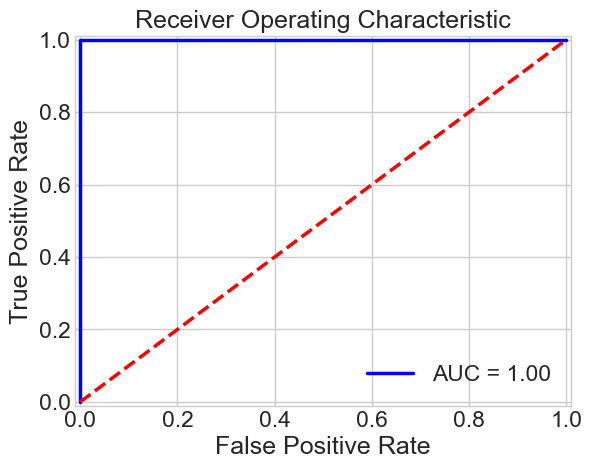

In [167]:
# Decision Tree Classifier
accuracy["Decision Tree Classifier"] = showResults("Decision Tree Classifier", DecisionTreeClassifier())

## Random Forest Classifier

In [143]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.28 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 7}

Model with rank: 4
Mean validation score: 0.999 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 17}

Model with rank: 5
Mean validation score: 0.999 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max

----------------------------------------------------------------------------------------------------
                                      Random Forest Classifier                                      
----------------------------------------------------------------------------------------------------
Accuracy: 100.0
Accuracy CV 10-Fold: 100.0
Running Time: 0:00:00.158217

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      2762

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       1.00      1.00      1.00      1154

    accuracy                           1.00      2437
   macro avg 

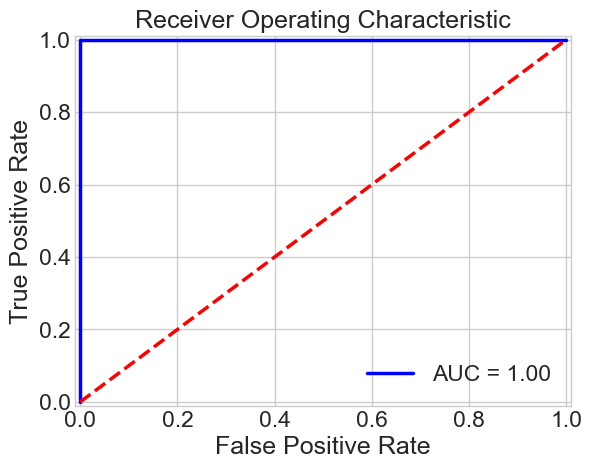

In [168]:
# Random Forest Classifier with one rank 1 hyperparameter set
accuracy["Random Forest Classifier"] = showResults("Random Forest Classifier", 
                                                    RandomForestClassifier(n_estimators=10, 
                                                                            min_samples_leaf=2, 
                                                                            min_samples_split=17, 
                                                                            criterion='gini', 
                                                                            max_features=8))

## Gradient Boosting trees

----------------------------------------------------------------------------------------------------
                                    Gradient Boosting Classifier                                    
----------------------------------------------------------------------------------------------------
Accuracy: 100.0
Accuracy CV 10-Fold: 100.0
Running Time: 0:00:01.045446

Classification Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      2762

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687


Classification Report Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       1.00      1.00      1.00      1154

    accuracy                           1.00      2437
   macro avg 

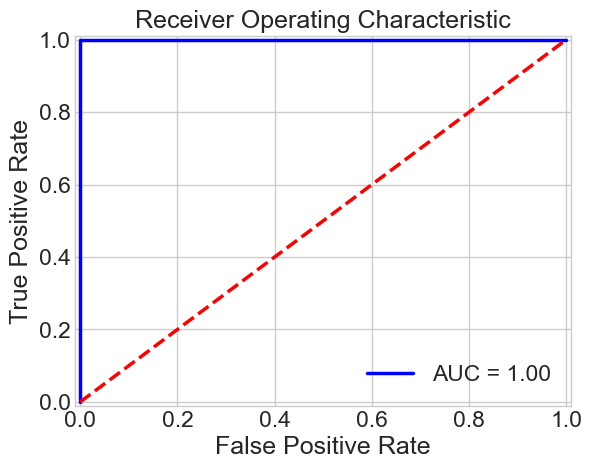

In [169]:
# Gradient Boosting Classifier
accuracy["Gradient Boosting Classifier"] = showResults("Gradient Boosting Classifier", GradientBoostingClassifier())

In [171]:
models = pd.DataFrame({
    'Model': list(accuracy.keys()),
    'Accuracy': [accuracy[x]["acc"] for x in accuracy.keys()]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K-Nearest Neighbors,100.00
5,Decision Tree Classifier,100.00
6,Random Forest Classifier,100.00
7,Gradient Boosting Classifier,100.00
4,Gradient Descent,97.33
3,Linear SVC,96.22
0,LogisticRegression,96.06
2,Gaussian Naive Bayes,83.22


In [172]:
models = pd.DataFrame({
    'Model': list(accuracy.keys()),
    'Accuracy': [accuracy[x]["acc_cv"] for x in accuracy.keys()]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Decision Tree Classifier,100.00
6,Random Forest Classifier,100.00
7,Gradient Boosting Classifier,100.00
1,K-Nearest Neighbors,99.98
0,LogisticRegression,95.85
3,Linear SVC,95.76
4,Gradient Descent,95.73
2,Gaussian Naive Bayes,83.15


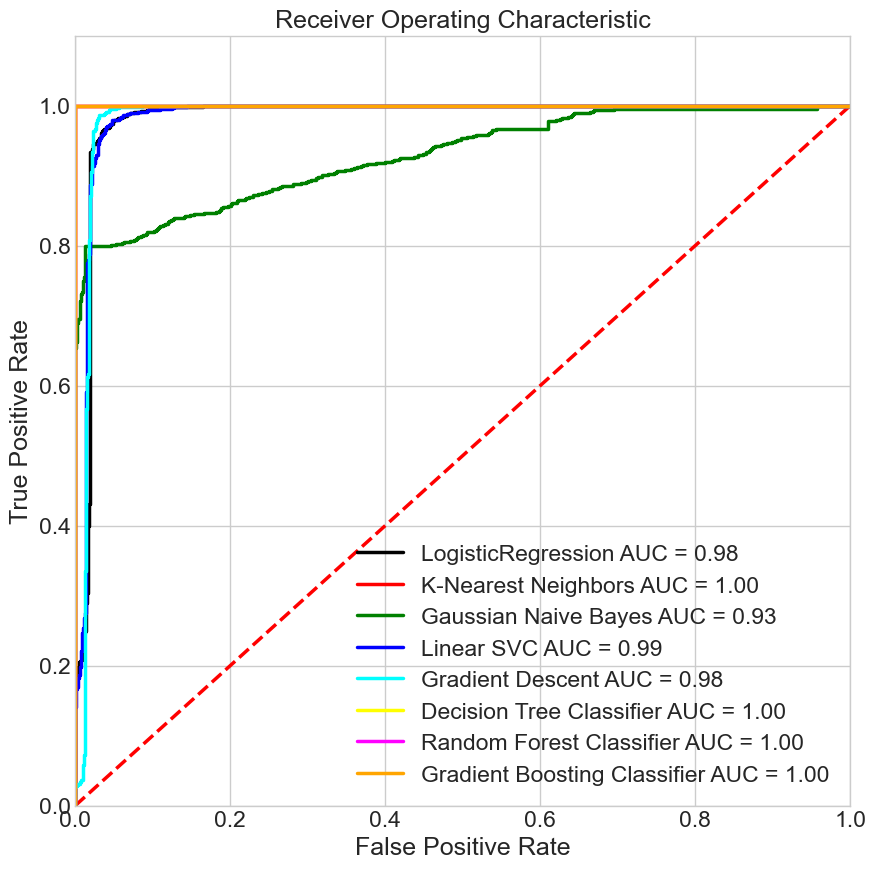

In [179]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label=model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc='lower right')

# compare ROC of all models using function plot_roc_curves
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')

colors = ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'magenta', 'orange', 'purple', 'pink']
i = 0
for model in accuracy.keys():
    prob = accuracy[model]["props"].reshape(-1, 1)  # Reshape to 2D array
    plot_roc_curves(y_test, prob, model)
    i += 1

plt.show()


In [181]:
# Compare time of all models
models = pd.DataFrame({
    'Model': list(accuracy.keys()),
    'Time': [accuracy[x]["log_time"] for x in accuracy.keys()]
})
models.sort_values(by='Time', ascending=True)

,Model,Time
5,Decision Tree Classifier,0.049865
4,Gradient Descent,0.136988
6,Random Forest Classifier,0.158217
0,LogisticRegression,0.593547
2,Gaussian Naive Bayes,0.827012
3,Linear SVC,0.868875
7,Gradient Boosting Classifier,1.045446
1,K-Nearest Neighbors,2.611185


In this dataset, Random Forest, Decision Trees and Gradient Boosting Trees performed very well. KNN also performed better than other remaining algorithms.